In [2]:
import numpy as np
import matplotlib.pyplot as plt

## ¿Qué son las muestras?
Asumiendo ausencia de aliasing, las muestras son medidas de voltaje promediadas en el período de muestreo.

$$
x[n] = (v_0, v_1, v_2, \dots, v_{n-1})
$$

In [47]:
A         = 5
N         = 2048
samp_rate = 1800000
deltaT    = 1 / samp_rate
volts     = A * np.ones(N) # [arbitrary voltage units]
nn        = np.linspace(0, N-1, N)
tt        = nn * deltaT

## ¿Qué es el cuadrado del valor absoluto de las muestras?
El cuadrado del valor absoluto de las muestras son medidas de potencia promediada en el período de muestreo, en unidades arbitrarias.

$$
p[n] = \left|x[n]\right|^2=x^*[n]x[n]
$$

In [4]:
P_t      = volts ** 2 # [arbitrary power units]

## ¿Qué es la suma de N potencias consecutivas?

Algo que tiene unidades de potencia y no es nada físico (aunque estamos cerca). Sin embargo, si $p[n]$ son potencias en unidades arbitrarias, esto quiere decir también que es una medida de la energía en unidades arbitrarias por unidad de tiempo. Podemos aprovechar la suma de potencias para estimar la **energía** a lo largo de $N$ muestras, multiplicando todo por $\Delta t$ (período de muestreo)

$$
E_N = \Delta t\sum_{n=0}^{N-1}p[n] = \frac{1}{f_s}\sum_{n=0}^{N-1}p[n]
$$

Otra cuenta relacionada es la **potencia media**, que se estima dividiendo esta suma por el número $N$ de muestras:

$$
\overline{P}_N = \frac{1}{N}\sum_{n=0}^{N-1}p[n]
$$

De lo que se deduce esta relación:

$$
E_N=N\Delta t\overline{P}_N=\frac{N}{f_s}\overline{P}_N 
$$

Aunque la moraleja de todo esto es que:

$$
E_N\propto P_N\propto \sum_{n=0}^{N-1} p[n]
$$

In [34]:
def power(x):
    return np.sum(np.abs(x)**2) / N

def energy(x):
    return np.sum(np.abs(x)**2) / samp_rate

Por ejemplo, para la función de antes:

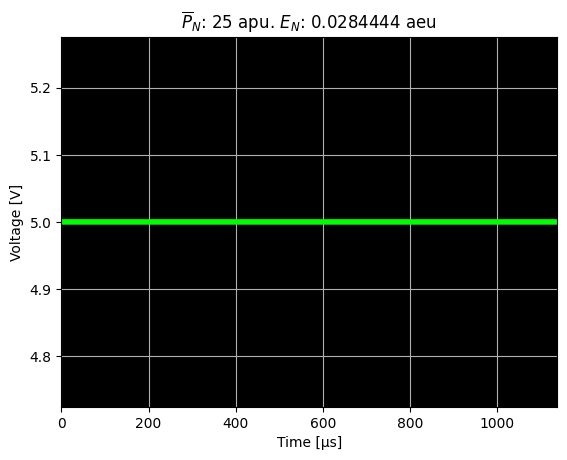

In [62]:
def plot_voltage(x):
    plt.plot(tt * 1e6, x, color = '#00ff00', linewidth = 4)
    plt.gca().set_facecolor('black')
    plt.xlim([0, np.max(tt) * 1e6])
    plt.xlabel('Time [µs]')
    plt.ylabel('Voltage [V]')
    plt.title(fr'$\overline{{P}}_N$: {power(x):g} apu. $E_N$: {energy(x):g} aeu')
    plt.grid()

def plot_voltage_complex(x):
    plt.plot(tt * 1e6, np.imag(x), color = '#ff00ff', linewidth = 4, label = 'Imaginary part')
    plt.plot(tt * 1e6, np.real(x), color = '#00ff00', linewidth = 4, label = 'Real part')
    plt.gca().set_facecolor('black')
    plt.xlim([0, np.max(tt) * 1e6])
    plt.xlabel('Time [µs]')
    plt.ylabel('Voltage [V]')
    plt.legend()
    plt.title(fr'$\overline{{P}}_N$: {power(x):g} apu. $E_N$: {energy(x):g} aeu')
    plt.grid()
    
plot_voltage(volts)

## ¿Qué es la transformada de Fourier discreta de un conjunto de muestras?

La transformada de Fourier discreta se define como:

$$
\hat x[k] = \sum_{n=0}^{N-1}x[n]e^{-j\frac{2\pi}N nk} = \boldsymbol{x}\cdot\boldsymbol a_k
$$

Donde $k$ va de $0$ a $N-1$. Si nos gusta más la definición matricial:

$$
\hat{\boldsymbol x} = A\boldsymbol x
$$

Donde $\boldsymbol x, \boldsymbol{\hat x}\in\mathbb C^N$ y $A\in\mathbb C^{N\times N}$. Así definida, no tiene interpretación física. Es una operación lineal, invertible, que se realiza sobre el conjunto ordenador de $N$ muestras. Nótese, no obstante, que para la frecuenciaa con $k=0$, $\hat x[0]$ es la _suma_ de todas las muestras $x[n]$. De nuevo tenemos una situación en la que hay cosas a medio construir.

## ¿Qué es el teorema de Parseval?
Es un teorema de formulación y demostración púramente matemática, ignorando por completo todos los aspectos físicos de las magnitudes involucradas que establece una relación entre **los cuadrados del valor absoluto de $x[n]$ y los cuadrados del valor absoluto de $\hat x[k]$**:

$$
\sum_{n=0}^{N-1}\left|x[n]\right|^2=\frac{1}{N}\sum_{k=0}^{N-1}\left|\hat x[k]\right|^2
$$

Sin embargo, esta relación la podemos dejar expresada **en términos de magnitudes ya conocidas antes**.

$$
E_N = \frac{1}{f_s N}\sum_{k=0}^{N-1}\left|\hat x[k]\right|^2
$$

O también:

$$
\overline P_N=\frac{1}{N^2}\sum_{k=0}^{N-1}\left|\hat x[k]\right|^2
$$

In [46]:
def power_fft(xhat):
    return np.sum(np.abs(xhat)**2) / N ** 2

def energy_fft(xhat):
    return np.sum(np.abs(xhat)**2) / (samp_rate * N)

xhat = np.fft.fft(volts)

print(fr'Power:  {power(volts):6.3f} apu (time), {power_fft(xhat):6.3f} apu (frequency)')
print(fr'Energy: {energy(volts):6.3f} aeu (time), {energy_fft(xhat):6.3f} aeu (frequency)')


Power:  25.000 apu (time), 25.000 apu (frequency)
Energy:  0.028 aeu (time),  0.028 aeu (frequency)


## Algunas observaciones

Una forma de expresar los senos y cosenos respecto de las exponenciales complejas es con combinaciones lineales como estas:

\begin{align}
\text{cos}[n]&=\frac{e^{jn} + e^{-jn}}{2} \\
\text{sin}[n]&=\frac{e^{jn} - e^{-jn}}{2j}
\end{align}

El caso del coseno es particularmente llamativo porque es una media aritmética de dos señales complejas. El caso del seno podría expresarse del mismo modo, jugando con el factor $1/j$ como un término de fase de $\pi / 2$ en las exponenciales.

Supongamos ahora que nuestra señal en $x[n]$ está compuesta por una exponencial compleja de amplitud $A$ que varía a lo largo de $k$ tal que, a lo largo de las $N$ muestras, da $m$ vueltas completas. Entonces $\hat x[k]$ vale 0 en todas partes salvo en $k=m$, donde vale (en valor absoluto) $N \times A$. Por Parseval, su potencia media $\overline P_N$ va a ser $A^2$. 

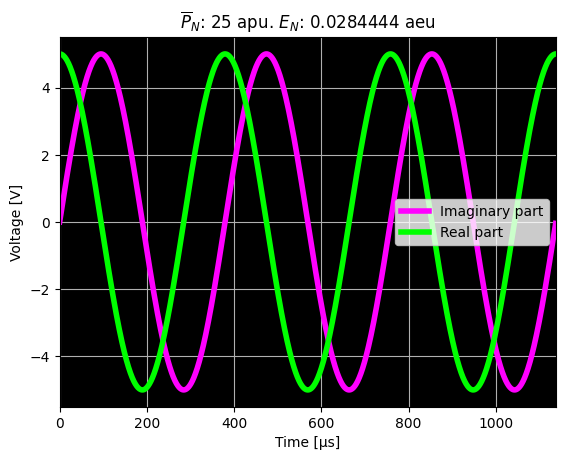

In [63]:
m  = 3
x1 = A * np.exp(1j * 2 * np.pi / N * m * nn)
plot_voltage_complex(x1)

Supongamos que nuestra señal está en $x[n]$ está compuesta por un sinusoide de amplitud $A$ que da un ciclo completo en $m$ vueltas. Entonces $\hat x[k]$ vale 0 en todas partes salvo en $k=m$ y $k=N-m$, donde vale (en valor absoluto) $N\times A/2$. Por Parseval, su potencia media $\overline P_N$ va a ser $2\times A^2/4$ = $A^2/2$.

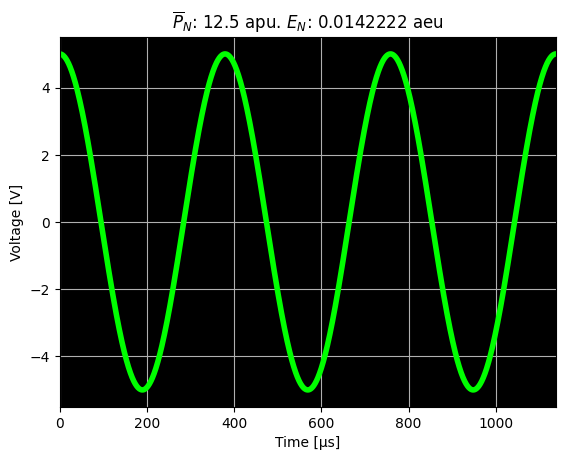

In [64]:
m  = 3
x2 = A * np.cos(2 * np.pi / N * m * nn)
plot_voltage(x2)

**Conclusión:** un seno o un coseno se puede expresar como la _media_ de dos exponenciales complejas de frecuencias opuestas. Sin embargo, la exponencial compleja lleva **el doble de potencia** que un sinusoide a la misma frecuencia. ¿Por qué? Porque la exponencial compleja, a diferencia del sinusoide, no cambia su amplitud instantánea al variar su fase. Su valor es siempre $A$ salvo un factor de fase, pero en el sinusoide pasa todo el rato de $A$ a $-A$ recorriendo todos los valores intermedios a lo largo de su ciclo.

## Sumando señales

De todo lo anterior podemos deducir un par de cosas muy interesantes:

* Si sumamos dos sinusoides enteros en $N$ muestras **que no tienen frecuencias en común**, sus potencias se suman: $\overline P_N = 2A^2$
* Si sumamos dos sinusoides enteros en $N$ muestras **que tienen frecuencias iguales** van a interferir entre ellos.
    * Por ejemplo, si **están en fase**, sus amplitudes $A, B$ van a interferir constructivamente y su potencia media va a ser proporcional a $|A+B|^2=A^2+B^2+2+2AB$. En el caso más fácil: $A=B$, la potencia de esta señal se multiplica no por 2, si no por 4: $\overline P_N = 4A^2$
    * Si por ejemplo, **están en contrafase**, sus amplitudes $A, B$ van a interferir destructivamente, y su potencia media va a ser $|A+B|^2=A^2+B^2-2AB$. En el caso más fácil, $A=B$, la potencia de esta señal se cancela completamente con la otra: $\overline P_N = 0$
    * Si por ejemplo, **están en cuadratura (es decir, a 90º)**, sus amplitudes $A, B$ van a interferir un poquito. Su potencia media va a resultar ser $|A+B|^2=|A|^2+|B|^2$. En el caso más fácil, $A=B$, la potencia de esta señal se duplica: $\overline P_N = 2A^2$

### Moraleja
Cuando sumamos señales no coherentes, sus potencias medias se suman. Cuando sumamos señales coherentes, **estas van a interferir** de forma que su potencia se puede amplificar hasta cuatro veces la de la más potente o cancelar completamente. Mientras mantengamos la relación de fase, podemos mantener esta relación de potencias "lejos" de 2. Si perdemos la coherencia, la potencia media va a oscilar entre 0 y 4. En promedio: lo hace con media 2.

**Afortunadamente:** casi nunca vemos interferencias desde otro sitio que mantengan relaciones de fase tan coherentes, salvo provocadas por reflexiones de señal y demás (aunque en ese caso preferimos hablar de side lobes, nulls y directividad, difracción).

### Sumando dos señales en frecuencias distintas

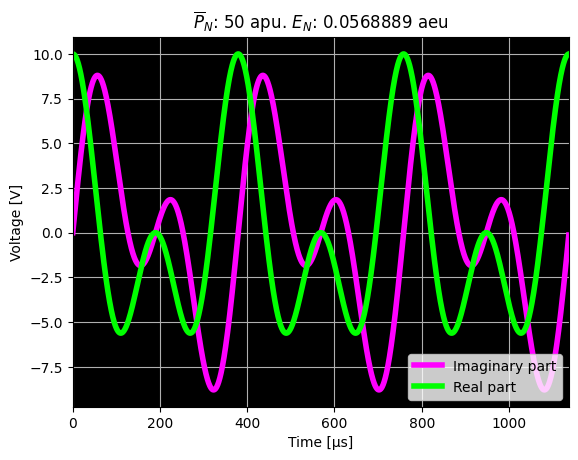

In [67]:
mA  = 3
mB  = 6
xA = A * np.exp(1j * 2 * np.pi / N * mA * nn)
xB = A * np.exp(1j * 2 * np.pi / N * mB * nn)
plot_voltage_complex(xA + xB)

### Sumando dos señales en frecuencias iguales (en fase)

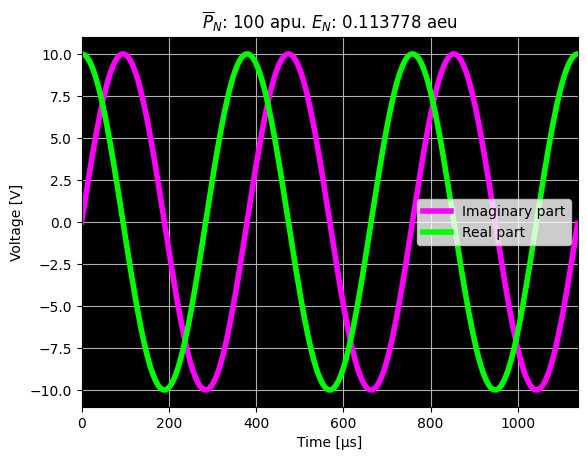

In [69]:
mA  = 3
mB  = 3
xA = A * np.exp(1j * 2 * np.pi / N * mA * nn)
xB = A * np.exp(1j * 2 * np.pi / N * mB * nn)
plot_voltage_complex(xA + xB)

### Sumando dos señales en frecuencias iguales (en contrafase)

(-11.0, 11.0)

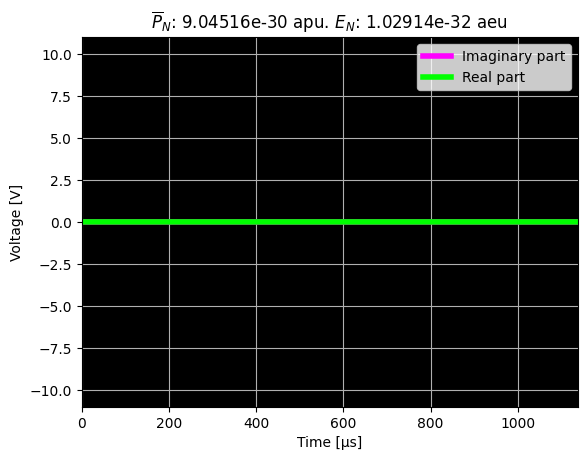

In [75]:
mA  = 3
mB  = 3
xA = A * np.exp(1j * 2 * np.pi / N * mA * nn)
xB = A * np.exp(1j * 2 * np.pi / N * mB * nn + 1j * np.pi)
plot_voltage_complex(xA + xB)
plt.ylim([-11, 11])

### Sumando dos señales en frecuencias iguales (en cuadratura)

(-11.0, 11.0)

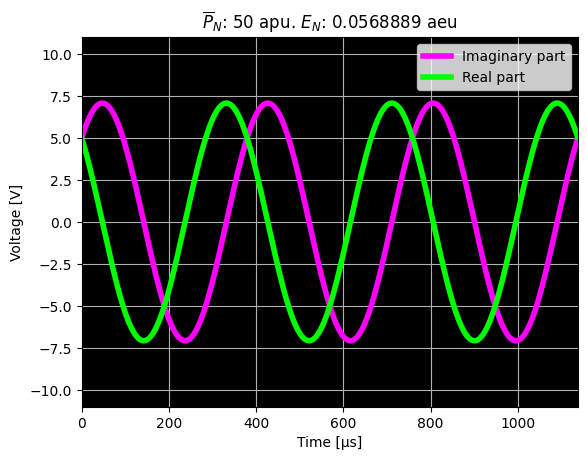

In [76]:
mA  = 3
mB  = 3
xA = A * np.exp(1j * 2 * np.pi / N * mA * nn)
xB = A * np.exp(1j * 2 * np.pi / N * mB * nn + 1j * np.pi / 2)
plot_voltage_complex(xA + xB)
plt.ylim([-11, 11])

# Espectros. Qué es lo que muestra SigDigger en pantalla.
Por el teorema de Parseval, hemos sacado que la suma de los cuadrados de los valores absolutos de la DFT (FFT) **con ciertas normalizaciones** son cantidades que tienen sentido físico para nosotros:

* **$E_N$**: sumando todos los cuadrados los los coeficientes de la FFT y normalizando por $1/(f_s N)$
* **$\overline P_N$**: sumando todos los cuadrados de los coeficientes de la FFT y normalizando por $1/N^2$.

El hecho de que estas sumas se hagan sobre los cuadrados de los valores absolutos de la FFT nos hace pensar que, _quizá_ sea conveniente entender los sumandos de esa suma como una función de **densidad de potencia en frecuencia**, tal que:

$$
\overline P_N=\Delta f\sum_{k=0}^{N-1}C |\hat x[k]|^2
$$

Donde $C$ es cierta normalización que hace que lo anterior se cumpla, y $\Delta f$ es nuestro RBW: es decir, el paso de frecuencia (de la radio) de un bin de la FFT al siguiente.

Como para un sample rate de $f_s$ tenemos que toda la FFT cubre precisamente una frecuencia de $f_s$, cada uno de estos bins representa un avance de frecuencia:

$$
\Delta f = \frac{f_s}{N}
$$

Por Parseval y todo lo anterior, nos tiene que salir que el sumatorio debe multiplicarse por $1/N^2$ para que las cuentas cuadren. Así que esto tiene que dar:

$$
C \Delta f = \frac{1}{N^2}
$$

O dicho de otro modo:

$$
C \frac{f_s}{N} = \frac{1}{N^2}
$$

Y por lo tanto:

$$
C = \frac{1}{Nf_s}
$$

Cuando multiplicamos los cuadrados del valor absoluto de la FFT por esta constante, **tenemos una aproximación de la densidad espectral de potencia**. Esto implica que, **si la suma de muestras al cuadrado del valor absoluto tienen unidades de $\text{apu}$ (arbitrary power units), entonce los bins FFT al cuadrado de su valor absoluto tienen unidades de $\text{apu}\text { Hz}^{-1}$**. Esto es **el eje vertical de la vista de espectro de SigDigger**.

```c
SUPRIVATE
SU_METHOD(su_smoothpsd, SUBOOL, exec_fft)
{
  unsigned int i;
  SUFLOAT wsizeinv = 1. / (self->params.fft_size * self->nominal_rate);

  /* Execute FFT */
  SU_FFTW(_execute(self->fft_plan));

  /* Keep real coefficients only */
  for (i = 0; i < self->params.fft_size; ++i)
    self->realfft[i] =
        wsizeinv * SU_C_REAL(self->fft[i] * SU_C_CONJ(self->fft[i]));

  SU_TRYCATCH(
      (self->psd_func)(self->userdata, self->realfft, self->params.fft_size),
      return SU_FALSE);

  ++self->iters;

  return SU_TRUE;
}
```

## Cosas que esperamos que pasen

Cuando cambiamos el tamaño de la FFT no solo aumentamos la resolución en frecuencia, sino que además empezamos a observar varias cosas:

1. Si aumentamos el tamaño de la FFT, nos hace falta más y más tiempo para rellenar su buffer. Además, el inverso del RBW nos dice cuánto tiempo hemos tardado en rellenar la FFT. Una FFT de un RBW pequeño implica **siempre** que hemos tardado mucho tiempo en rellenarla.
2. Si tenemos una señal que tenga una densidad espectral de potencia constante (como por ejemplo, ruido blanco), entonces **su nivel no cambia cuando cambiamos el tamaño de la FFT**
3. Si tenemos una señal que es muy estrecha, mucho más estrecha que el RBW (como por ejemplo, una portadora), entonces **su nivel crece con el tamaño de la FFT (se reduce con el RBW)**. Esto sucede a que la misma potencia de la señal se va a distribuir en un bin de la FFT que representa un ancho de banda diferente.
4. Si seguimos aumentando el tamaño de la FFT hasta que empezamos a ver sus variaciones lentas, entonces **su nivel se estabiliza a partir de un RBW del orden de sus pequeñas variaciones**.
5. Pongámonos al tamaño mínimo de la FFT tal que a partir de ahí, el nivel de la portadora deja de crecer. Si esta ahora se empieza a mover, **su nivel se rebaja** ya que su potencia se reparte en más frecuencias.

# Qué calcula SNR tool

Suponemos que tenemos todo **siempre** en normalize by channel bandwidth. De este modo vemos siempre **densidades espectales de potencia**. Cuando definimos los probes, lo que tenemos es esto:

* **N**: Representa la densidad espectral de potencia del canal que hemos definido como **noise probe**. Tiene unidades de apu/Hz. Le llamamos **N** porque solo hay ruido, y esperamos que su densidad (de la parte de ruido) sea la misma que la del signal probe.
* **S+N**: Representa la densidad espectral de potencia en el canal que hemos definido como **signal probe**. Tiene unidades de apu/Hz. Le llamamos **S+N** porque en ese canal tenemos sumada la potencia de la señal y la potencia del ruido. Se suman porque el ruido es incoherente por naturaleza.

A partir de aquí se calculan dos medidas del SNR:

* **SNNR**: de "signal noise to noise ratio". Sin unidades (es una relación entre dos magnitudes de las mismas unidades). Es simplemente la densidad espectral de potencia observada en el Signal probe y en el Noise Probe ($\frac{S+N}{N}$). Si abrimos la signal probe y la noise probe en el mismo sitio (es decir, caso sin señal), **debemos observar un ratio que oscila alrededor de 1 (0 dB)**, ya que la potencia de ambos canales es la misma (es el mismo canal).
* **SNR**: de "signal to noise ratio". Sin unidades. Representa **la relación de la densidad de potencia debida únicamente a la señal (distribuida en el ancho de banda del signal probe) entre la densidad de ruido**. Esto se calcula restando la potencia del ruido a la suma de potencia más ruido, por lo que el SNR es simplemente el SNNR - 1 (o sea $S/N$). Si repetimos el experimento de abrir el noise probe y el signal probe en el mismo sitio, sin señal, **debemos observar un ratio que oscila alrededor de 0 (-$\infty$ dB)**. Si al ruido le restas el ruido, te quedas con nada.

El problema de estas medidas es que, para señales muy estrechas, no vale de nada. Tenemos el problema de siempre: para distintos anchos del canal, vamos a medir distintas densidades de señal. Y eso no nos vale. Por eso existe esta otra medida: el **SNR equivalente a un ancho de banda**. Este valor **no cambia con el ancho de banda de las probes**, y se calcula de este modo:

1. Habiendo obtenido la densidad espectral de señal, la multiplicamos por **su ancho de banda**. Esto nos da la **potencia de señal** (en apu) que entra en el ancho de banda.
2. Ahora, dividimos esa potencia por **el ancho de banda de referencia (Ref BW)**. El resultado es una nueva densidad de potencia, que sería la de la señal si toda su potencia se hubiese concentrado en este ancho de banda.

De aquí tenemos dos nuevas medidas:

* **eSNNR**: de "equivalent SNNR". Sin unidades. Representa el SNNR asumiendo que la potencia de señal está entrando en un ancho de banda dado por el Ref BW. Es simplemente el eSNR + 1.
* **eSNR**: de "equivalent SNR". Sin unidades. Representa el SNR asumiendo lo mismo, y se calcula como se explicó antes.